In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# importing the csv file, do basic inspection, dropping NaN values

In [2]:
# depression by level of education 2014 dataset
df_edu = pd.read_csv('../data/depression-by-level-of-education-employment.csv')
df_gen = pd.read_csv('../data/gender/gender_hdi.csv')
df_country = pd.read_csv('../data/number-with-depression-by-country.csv')
df_devInd = pd.read_csv('../data/human-development-index.csv')
df_depr = pd.read_csv('../data/prevalence-of-depression-by-age.csv')
df_happiness = pd.read_csv('../data/world_happiness_index.csv')

functions used to check for mismatches in different csv files are the same, in this case country names

In [3]:
def list_diff(list1, list2): 
    return (list(set(list1) - set(list2))) 

load and inspect df_country

In [4]:
df_country.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,318435.813670
1,Afghanistan,AFG,1991,329044.773956
2,Afghanistan,AFG,1992,382544.572895
3,Afghanistan,AFG,1993,440381.507393
4,Afghanistan,AFG,1994,456916.645489


In [5]:
df_country.rename(columns = {'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)': 'absolute_numbers'}, inplace= True)

In [6]:
df_country_nan = df_country[df_country.isna().any(axis=1)]
entity_list = [i for i in df_country_nan['Entity']]
nan_value_countries = set(entity_list)

Since df_country only have absolute numbers, we wil use df_depr due to the avaibility of the percentage

In [7]:
df_depr.rename(columns ={'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)':'depression_percentage'}, inplace=True)

In [8]:
df_depr = df_depr[['Entity','Code','Year','depression_percentage']]

In [9]:
df_depr.sample(5)

,Entity,Code,Year,depression_percentage
5543,Swaziland,SWZ,2017,4.067654
4139,North Africa and Middle East,NaN,2013,3.948239
2996,Kiribati,KIR,1990,3.258509
1311,Colombia,COL,2013,2.204213
4021,New Zealand,NZL,2007,4.079556


did a lot of work on pivoting the table, just to realise at the end it would be bad practice, so all codes have been turned to comments

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


#fig, ax1 = plt.subplots(figsize=(15,5))
#plt.plot(country_year_sex.groupby(['year']).agg({'suicides_no':sum}))

In [88]:
def data_country1(country):
    i = df_depr.loc[df_depr['Entity']==country]
    return i

In [90]:
def plot_depr(country):
    fig , ax1 = plt.subplots(figsize=(15,5))
    sns.scatterplot(data=data_country1(country), 
                 x=data_country1(country)['Year'],
                 y=data_country1(country)['depression_percentage'],
                 color='blue',ax=ax1)

#plt.plot(df_depr.groupby(['Year']))

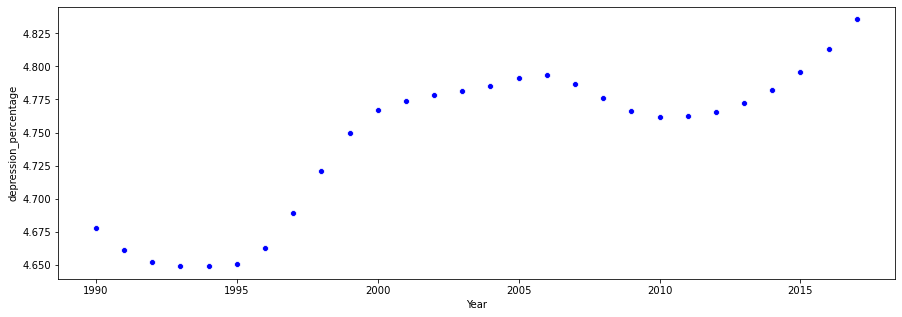

In [91]:
plot_depr('United States')

world rate of depression between 1990 - 2017

<AxesSubplot:xlabel='Year', ylabel='depression_percentage'>

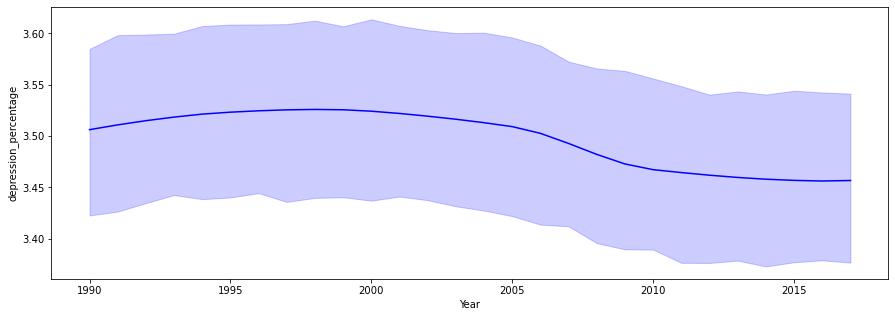

In [93]:
fig , ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=df_depr, x='Year',y='depression_percentage',color='blue',ax=ax)


In [11]:
# Code practices on pandas.series

In [12]:
# test = df_country.groupby(['Entity']).absolute_numbers.mean()
# test
# type(test)
# indexlist = [i for i in test.index]
# len(indexlist) 
# test.loc['Germany']

In [13]:
# code practices ond pivot_table and multiIndex, here pivot_table is not needed since it would turn the already tidy data into untidy data!

In [14]:
#df_country_pivot = df_country.pivot_table(index=['Entity'], columns=['Year'], values=['absolute_numbers'])
#df_country_pivot.loc[:,('absolute_numbers',1995)]
#df_country_pivot.loc['Germany',('absolute_numbers',1995)]
#df_country_pivot.loc['Germany',('absolute_numbers')]
#df_country_pivot.loc['Germany',('absolute_numbers',(1995,2016))]
#df_country_pivot.columns
#df_devInd.head()
# df_devInd_2index = df_devInd.set_index(['Entity','Year'])
# df_devInd_2index.sort_index(inplace = 'True')
# df_devInd_2index.head(5)
# multiindex, visually beautiful, but not tidy
# df_devInd_2index = df_devInd_2index.reset_index()
# len(df_devInd_2index.index)
# df_devInd_2index.columns
# df_devInd_2index.iloc[0,0]
# if dataframe is not pivoted, or pivoted with dual index (country, year), then concat like this:
# merged_df = pd.merge(df1,df2,left_index=True,right_index=True)

loading and cleaning of dataset 'human development index'

In [15]:
df_devInd.rename(columns={'Human Development Index (UNDP)':'HDI_UNDP'},inplace =True)

In [16]:
df_devInd.shape

(5001, 4)

In [17]:
df_devInd.sample(5)

,Entity,Code,Year,HDI_UNDP
3893,Senegal,SEN,1994,0.366
4104,South Africa,ZAF,1998,0.639
454,Benin,BEN,1980,0.286
4102,South Africa,ZAF,1996,0.647
549,Botswana,BWA,1994,0.575


Creating a dataframe consisting of information on HDI and depression level for a range of years

In [18]:
df_depression_hdi = df_depr.merge(df_devInd, how='inner', left_on=['Entity','Year'], right_on=['Entity','Year'])

In [19]:
df_depression_hdi = df_depression_hdi.drop(['Code_y'],axis=1)

In [20]:
df_depression_hdi = df_depression_hdi.rename(columns={'Code_x':'Code'})

In [21]:
df_depression_hdi.isnull().sum()

Entity                   0
Code                     0
Year                     0
depression_percentage    0
HDI_UNDP                 0
dtype: int64

In [22]:
# dataframe on depression level and Hdi
df_depression_hdi.shape

(4680, 5)

In [23]:
len(set(df_depression_hdi['Entity']))

185

In [24]:
df_depression_hdi.tail(7)

,Entity,Code,Year,depression_percentage,HDI_UNDP
4673,Zimbabwe,ZWE,2011,3.109526,0.478
4674,Zimbabwe,ZWE,2012,3.118072,0.505
4675,Zimbabwe,ZWE,2013,3.128192,0.516
4676,Zimbabwe,ZWE,2014,3.140290,0.525
4677,Zimbabwe,ZWE,2015,3.155710,0.529
4678,Zimbabwe,ZWE,2016,3.174134,0.532
4679,Zimbabwe,ZWE,2017,3.192789,0.535


In [25]:
df_depression_hdi.corr(method='pearson')['depression_percentage'].sort_values()

Year                    -0.057807
HDI_UNDP                -0.032316
depression_percentage    1.000000
Name: depression_percentage, dtype: float64

check happiness for nan value and select relevant data for further analysis 

In [26]:
df_happiness.isna().sum()<100

Country name                                                 True
Year                                                         True
Life Ladder                                                  True
Log GDP per capita                                           True
Social support                                               True
Healthy life expectancy at birth                             True
Freedom to make life choices                                 True
Generosity                                                   True
Perceptions of corruption                                    True
Positive affect                                              True
Negative affect                                              True
Confidence in national government                           False
Democratic Quality                                          False
Delivery Quality                                            False
Standard deviation of ladder by country-year                 True
Standard d

In [27]:
df_happiness = df_happiness[['Country name', 'Year', 'Life Ladder', 'Log GDP per capita']]
df_happiness.rename(columns={'Country name':'Entity','Life Ladder':'life_ladder','Log GDP per capita':'log_gdp_capita'}, inplace=True)

merge happiness index and depression/hdi dataframes

In [28]:
df_hdi_happiness = df_depression_hdi.merge(df_happiness,on=['Entity', 'Year'])

In [29]:
df_hdi_happiness.isnull().sum()

Entity                   0
Code                     0
Year                     0
depression_percentage    0
HDI_UNDP                 0
life_ladder              0
log_gdp_capita           3
dtype: int64

In [30]:
df_hdi_happiness[df_hdi_happiness.isnull().any(axis=1)]

,Entity,Code,Year,depression_percentage,HDI_UNDP,life_ladder,log_gdp_capita
1220,South Sudan,SSD,2017,3.699147,0.388,"2,816622496",NaN
1276,Syria,SYR,2015,3.547811,0.538,"3,46191287",NaN
1467,Yemen,YEM,2017,4.012346,0.452,"3,253560066",NaN


In [31]:
len(set(df_hdi_happiness['Entity']))

155

In [32]:
df_hdi_happiness.sample(5)

,Entity,Code,Year,depression_percentage,HDI_UNDP,life_ladder,log_gdp_capita
9,Afghanistan,AFG,2017,4.136347,0.498,"2,66171813","7,497754574"
991,Nigeria,NGA,2017,3.917691,0.532,"5,321928024","8,582691193"
1093,Romania,ROU,2014,2.340368,0.802,"5,726893425","9,887231827"
1076,Portugal,PRT,2013,4.675021,0.837,"5,157688141","10,15247917"
1003,Pakistan,PAK,2009,3.331079,0.522,"5,208146572","8,367408752"


In [132]:
df_hdi_happiness.dtypes

Entity                    object
Code                      object
Year                       int64
depression_percentage    float64
HDI_UNDP                 float64
life_ladder               object
log_gdp_capita            object
dtype: object

In [144]:
df_hdi_happiness['life_ladder'] = df_hdi_happiness['life_ladder'].str.replace(',','.')
df_hdi_happiness['log_gdp_capita'] = df_hdi_happiness['log_gdp_capita'].str.replace(',','.')

In [146]:
df_hdi_happiness['life_ladder'] = df_hdi_happiness['life_ladder'].astype(float)
df_hdi_happiness['log_gdp_capita'] = df_hdi_happiness['log_gdp_capita'].astype(float)

In [147]:
df_hdi_happiness.sample(1)

,Entity,Code,Year,depression_percentage,HDI_UNDP,life_ladder,log_gdp_capita
998,Norway,NOR,2017,3.77191,0.953,7.578745,11.079062


In [114]:
def data_country2(country):
    i = df_hdi_happiness.loc[df_hdi_happiness['Entity']==country]
    return i

In [115]:
def plot_hdi_happiness(country):
    fig , ax1 = plt.subplots(figsize=(15,5))
    sns.lineplot(data=data_country2(country), 
                 x=data_country2(country)['HDI_UNDP'],
                 y=data_country2(country)['depression_percentage'],
                 color='blue',ax=ax1)

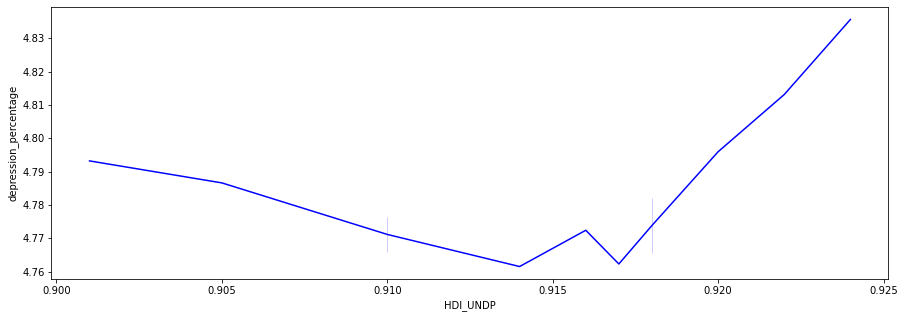

In [117]:
plot_hdi_happiness('United States')

In [154]:
df_hdi_happiness2015 = df_hdi_happiness[df_hdi_happiness['Year']==2015]
df_hdi_happiness2015

,Entity,Code,Year,depression_percentage,HDI_UNDP,life_ladder,log_gdp_capita
7,Afghanistan,AFG,2015,4.135419,0.493,3.982855,7.500539
17,Albania,ALB,2015,2.204454,0.776,4.606651,9.302960
39,Argentina,ARG,2015,3.657683,0.822,6.697131,9.858329
51,Armenia,ARM,2015,2.740289,0.748,4.348320,9.011394
62,Australia,AUS,2015,4.696774,0.936,7.309061,10.690199
...,...,...,...,...,...,...,...
1443,Venezuela,VEN,2015,2.811889,0.775,5.568800,9.655211
1455,Vietnam,VNM,2015,2.881750,0.684,5.076315,8.622428
1465,Yemen,YEM,2015,4.017056,0.483,2.982674,7.744412
1476,Zambia,ZMB,2015,3.576608,0.583,4.843164,8.196217


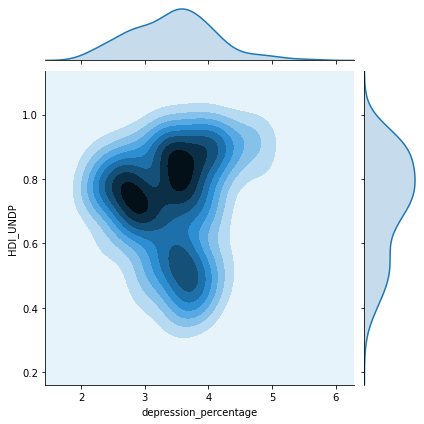

In [159]:
hh_2015 = sns.jointplot(data = df_hdi_happiness2015, x = "depression_percentage", 
                     y = "HDI_UNDP", kind='kde') 

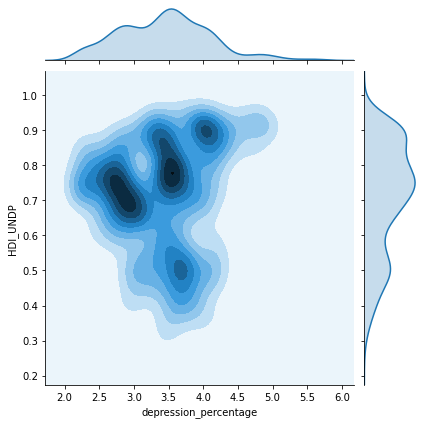

In [160]:
hh = sns.jointplot(data = df_hdi_happiness, x = "depression_percentage", 
                     y = "HDI_UNDP", kind='kde') 

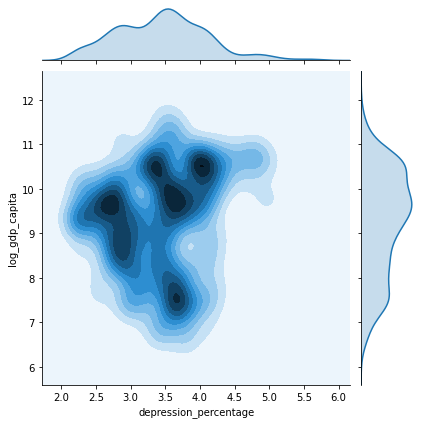

In [148]:
vis7 = sns.jointplot(data = df_hdi_happiness, x = "depression_percentage", 
                     y = "log_gdp_capita", kind='kde') 

In [158]:
df_hdi_happiness2015.corr(method='pearson')['depression_percentage'].sort_values()

HDI_UNDP                 0.024008
log_gdp_capita           0.054610
life_ladder              0.058434
depression_percentage    1.000000
Year                          NaN
Name: depression_percentage, dtype: float64

<AxesSubplot:xlabel='log_gdp_capita', ylabel='depression_percentage'>

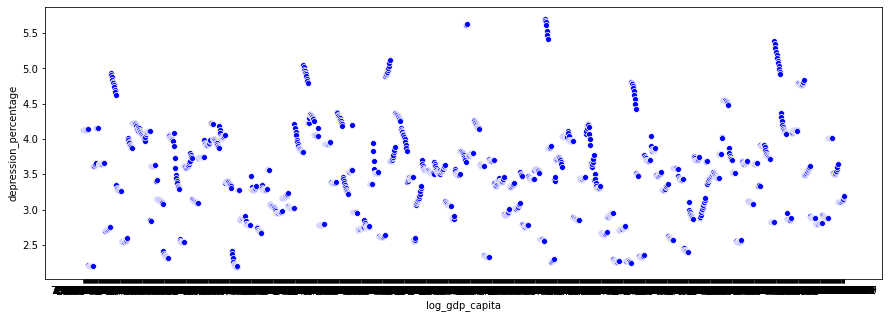

In [104]:
# depression / log_gdp_capita
fig , ax1 = plt.subplots(figsize=(15,5))
sns.scatterplot(data=df_hdi_happiness, 
             x=df_hdi_happiness['log_gdp_capita'],
             y=df_hdi_happiness['depression_percentage'],
             color='blue',ax=ax1)

In [118]:
# depression / log_gdp_capita by country 
    
def plot_hdi_gdp(country):
    fig , ax1 = plt.subplots(figsize=(15,5))
    sns.scatterplot(data=data_country2(country), 
                 x=data_country2(country)['log_gdp_capita'],
                 y=data_country2(country)['depression_percentage'],
                 color='blue',ax=ax1)

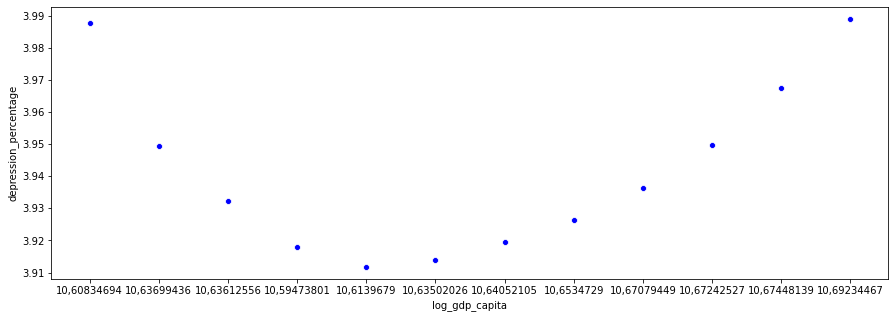

In [123]:
plot_hdi_gdp('Canada')

<AxesSubplot:xlabel='life_ladder', ylabel='depression_percentage'>

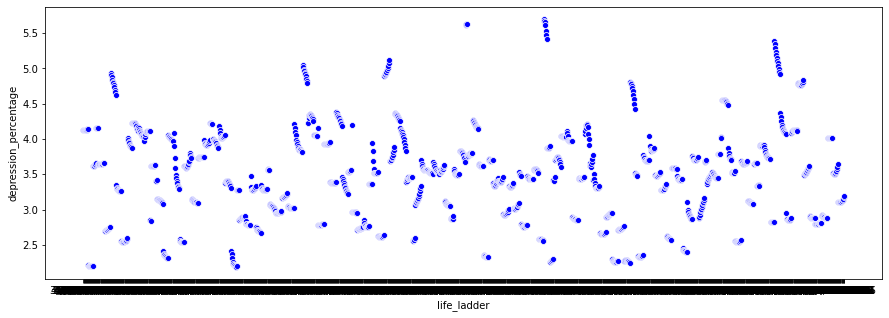

In [102]:
# depression / Happiness
fig , ax1 = plt.subplots(figsize=(15,5))
sns.scatterplot(data=df_hdi_happiness, 
             x=df_hdi_happiness['life_ladder'],
             y=df_hdi_happiness['depression_percentage'],
             color='blue',ax=ax1)

In [ ]:
# depression / Happiness / hdi
fig , ax1 = plt.subplots(figsize=(15,5))
sns.scatterplot(data=df_hdi_happiness, 
             x=df_hdi_happiness['life_ladder'],
             y=df_hdi_happiness['depression_percentage'],
             color='blue',ax=ax1)

<AxesSubplot:xlabel='HDI_UNDP', ylabel='depression_percentage'>

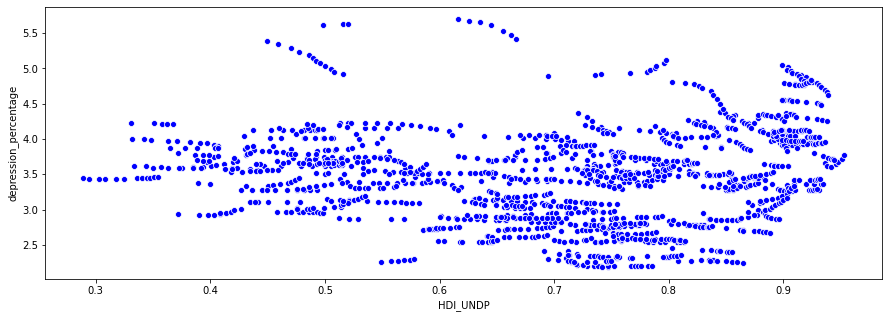

In [101]:
# depression / HDI
fig , ax1 = plt.subplots(figsize=(15,5))
sns.scatterplot(data=df_hdi_happiness, 
             x=df_hdi_happiness['HDI_UNDP'],
             y=df_hdi_happiness['depression_percentage'],
             color='blue',ax=ax1)

load education dataset

In [33]:
df_edu.head(1)

,Entity,Code,All levels of education (active),All levels of education (employed),All levels of education (total),Below upper secondary education (active),Below upper secondary education (employed),Below upper secondary education (total),Tertiary education (active),Tertiary education (employed),Tertiary education (total),Upper secondary and post-secondary non-tertiary education (active),Upper secondary and post-secondary non-tertiary education (employed),Upper secondary and post-secondary non-tertiary education (total)
0,Austria,AUT,6.5,4.7,7.7,15.5,9.0,15.2,4.3,3.5,5.5,5.5,4.2,6.7


In [34]:
df_edu = df_edu[['Entity', 'Code', 'All levels of education (total)', 'Below upper secondary education (total)', 'Tertiary education (total)', 'Upper secondary and post-secondary non-tertiary education (total)']]

In [35]:
# replace slovak republic with slovakis so there the country naming are identical between different dataframes
df_edu = df_edu.replace('Slovak Republic', 'Slovakis')

Creating a Dataframe on education level and depression, dataset on education level is only avaiable for 2014

In [36]:
# select only values for the year 2014
df_depression_hdi_2014 = df_depression_hdi.loc[df_depression_hdi['Year']==2014]
df_depression_hdi_2014

,Entity,Code,Year,depression_percentage,HDI_UNDP
12,Afghanistan,AFG,2014,4.133526,0.491
40,Albania,ALB,2014,2.203684,0.773
68,Algeria,DZA,2014,3.629490,0.747
86,Andorra,AND,2014,3.728379,0.853
105,Angola,AGO,2014,4.156468,0.564
...,...,...,...,...,...
4564,Venezuela,VEN,2014,2.810428,0.778
4592,Vietnam,VNM,2014,2.882767,0.678
4620,Yemen,YEM,2014,4.018785,0.505
4648,Zambia,ZMB,2014,3.552409,0.580


In [37]:
df_depression_hdi_edu = df_edu.merge(df_depression_hdi_2014, left_on='Entity', right_on='Entity')
df_depression_hdi_edu
df_depression_hdi_edu.rename(columns={'All levels of education (total)':'all_levels', 'Below upper secondary education (total)':'below_secondary',
                                     'Tertiary education (total)':'tertiary','Upper secondary and post-secondary non-tertiary education (total)':'secondary_&_above'},
                                      inplace = True)

In [38]:
# create dataframe on the relationship between education level, depression level and hdi for year 2014, since education level is only 
# available for 2014 
df_depression_hdi_edu

,Entity,Code_x,all_levels,below_secondary,tertiary,secondary_&_above,Code_y,Year,depression_percentage,HDI_UNDP
0,Austria,AUT,7.7,15.2,5.5,6.7,AUT,2014,3.267460,0.901
1,Belgium,BEL,7.1,11.6,4.2,7.5,BEL,2014,4.110472,0.909
2,Czech Republic,CZE,4.0,6.0,2.0,4.4,CZE,2014,2.690526,0.879
3,Denmark,DNK,8.3,15.5,6.7,8.8,DNK,2014,3.277973,0.928
4,Estonia,EST,5.1,6.4,4.3,5.2,EST,2014,3.902099,0.864
5,Finland,FIN,10.7,14.4,8.9,13.2,FIN,2014,4.888971,0.914
6,France,FRA,6.3,9.4,4.9,5.7,FRA,2014,4.316753,0.894
7,Germany,DEU,11.6,17.0,8.9,12.5,DEU,2014,3.940119,0.930
8,Greece,GRC,3.6,5.4,2.4,3.4,GRC,2014,4.252704,0.864
9,Hungary,HUN,4.7,10.3,2.8,4.2,HUN,2014,2.753656,0.833


# Bonus: 1. Gender Equality and Depression, 2. Icecream consumption and Depression

In [39]:
df_hdi_gen = df_depression_hdi.merge(df_gen, left_on = 'Entity', right_on = 'Country').drop(['Entity'], axis=1)

In [40]:
df_hdi_gen

,Code,Year,depression_percentage,HDI_UNDP,HDI Rank (2018),Country,1990,1991,1992,1993,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AFG,2002,4.124928,0.373,170,Afghanistan,0.298,0.304,0.312,0.308,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,AFG,2003,4.125230,0.383,170,Afghanistan,0.298,0.304,0.312,0.308,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
2,AFG,2004,4.126384,0.398,170,Afghanistan,0.298,0.304,0.312,0.308,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
3,AFG,2005,4.126908,0.408,170,Afghanistan,0.298,0.304,0.312,0.308,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
4,AFG,2006,4.128638,0.417,170,Afghanistan,0.298,0.304,0.312,0.308,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,ZWE,2013,3.128192,0.516,150,Zimbabwe,0.498,0.500,0.485,0.480,...,0.448,0.472,0.490,0.516,0.527,0.537,0.544,0.549,0.553,0.563
4172,ZWE,2014,3.140290,0.525,150,Zimbabwe,0.498,0.500,0.485,0.480,...,0.448,0.472,0.490,0.516,0.527,0.537,0.544,0.549,0.553,0.563
4173,ZWE,2015,3.155710,0.529,150,Zimbabwe,0.498,0.500,0.485,0.480,...,0.448,0.472,0.490,0.516,0.527,0.537,0.544,0.549,0.553,0.563
4174,ZWE,2016,3.174134,0.532,150,Zimbabwe,0.498,0.500,0.485,0.480,...,0.448,0.472,0.490,0.516,0.527,0.537,0.544,0.549,0.553,0.563
